<a href="https://colab.research.google.com/github/Maimun-Batlapadu/Retinol-seg/blob/main/Retinolbloodvessel_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Retinal Blood Vessel Segmentation using CNN
# Author: Maimun Batlapadu (Moon)

# Step 1: Install dependencies
!pip install opencv-python-headless

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
def generate_dummy_data(num_images=100, image_size=64):
    images = np.random.rand(num_images, image_size, image_size, 1)
    masks = np.random.randint(0, 2, (num_images, image_size, image_size, 1))
    return images, masks

X, y = generate_dummy_data()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')
    ])
    return model

model = create_cnn_model((64, 64, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 1)      │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,529 (650.50 KB)

 Trainable params: 166,529 (650.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=8, validation_split=0.1)


Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - accuracy: 0.5014 - loss: 0.6938 - val_accuracy: 0.5019 - val_loss: 0.6931
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.5001 - loss: 0.6932 - val_accuracy: 0.5014 - val_loss: 0.6931
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.5025 - loss: 0.6931 - val_accuracy: 0.5015 - val_loss: 0.6932
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.4984 - val_loss: 0.6933


In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.5019 - loss: 0.6932
Test Accuracy: 50.19%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


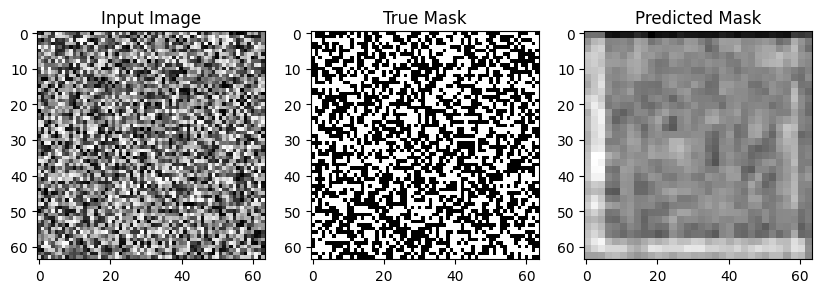

In [ ]:
def visualize_prediction(model, X, y, index):
    pred = model.predict(np.expand_dims(X[index], axis=0))[0]
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(X[index].squeeze(), cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(y[index].squeeze(), cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(pred.squeeze(), cmap='gray')
    plt.show()

visualize_prediction(model, X_test, y_test, 0)